In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten,BatchNormalization,Rescaling
from keras.datasets import mnist
from keras.losses import sparse_categorical_crossentropy,squared_hinge
from keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical,load_img,array_to_img
import numpy as np
from matplotlib import pyplot as plt
from keras import Model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from PIL import Image

from keras import layers
from tensorflow.keras import applications
from keras.applications import MobileNetV2,VGG19,ResNet50
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix,classification_report

from tqdm import tqdm

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/aptos 2019/train_1.csv')
test_df = pd.read_csv('/content/drive/MyDrive/aptos 2019/test.csv')
valid_df=pd.read_csv('/content/drive/MyDrive/aptos 2019/valid.csv')
print(train_df.shape)
print(test_df.shape)
print(test_df.head())
train_df.columns

(2930, 2)
(366, 2)
        id_code  diagnosis
0  e4dcca36ceb4          0
1  e4e343eaae2a          2
2  e4f12411fd85          4
3  e50b0174690d          0
4  e5197d77ec68          0


Index(['id_code', 'diagnosis'], dtype='object')

In [ ]:
y_train = train_df['diagnosis']
y_val = test_df['diagnosis']
y_valid=valid_df['diagnosis']

print(y_train.shape)

print(y_val.shape)
print(y_valid.shape)

(2930,)
(366,)
(366,)


In [ ]:
x_train_vgg19_features=np.load("/content/drive/MyDrive/aptos 2019/vgg19_X_train.npy")
x_val_vgg19_features=np.load("/content/drive/MyDrive/aptos 2019/vgg19_X_val.npy")
x_train_resnet50_features=np.load("/content/drive/MyDrive/aptos 2019/resnet_X_train.npy")
x_val_resnet50_features=np.load("/content/drive/MyDrive/aptos 2019/resnet_X_val.npy")
x_valid_vgg19_features=np.load("/content/drive/MyDrive/aptos 2019/vgg19_X_valid.npy")
x_valid_resnet50_features=np.load("/content/drive/MyDrive/aptos 2019/resnet_X_valid.npy")

In [ ]:
x_valid_vgg19_features=np.load("/content/drive/MyDrive/aptos 2019/vgg19_X_valid.npy")
x_valid_resnet50_features=np.load("/content/drive/MyDrive/aptos 2019/resnet_X_valid.npy")

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
BATCH_SIZE=32
# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers
dense_1 = Dense(512, activation='relu')(input_vgg19)
dense_2 = Dense(256, activation='relu')(dense_1)
dense_3 = Dense(128, activation='relu')(dense_2)

# Cross-pooling layer to combine VGG19 and ResNet50 features
cross_pooled = Concatenate()([dense_3, input_resnet50])

dense_4 = Dense(64, activation='relu')(cross_pooled)
dense_5 = Dense(32, activation='relu')(dense_4)
output = Dense(5, activation='softmax')(dense_5)

# Create the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] / BATCH_SIZE,
    epochs=100,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/100
91/91 [==============================] - 7s 25ms/step - loss: 2.7849 - accuracy: 0.6840 - val_loss: 0.8075 - val_accuracy: 0.7295
Epoch 2/100
91/91 [==============================] - 2s 18ms/step - loss: 0.5601 - accuracy: 0.7949 - val_loss: 0.7633 - val_accuracy: 0.7787
Epoch 3/100
91/91 [==============================] - 2s 16ms/step - loss: 0.3714 - accuracy: 0.8689 - val_loss: 0.7170 - val_accuracy: 0.8005
Epoch 4/100
91/91 [==============================] - 2s 16ms/step - loss: 0.2652 - accuracy: 0.9154 - val_loss: 0.6622 - val_accuracy: 0.7923
Epoch 5/100
91/91 [==============================] - 2s 17ms/step - loss: 0.2053 - accuracy: 0.9294 - val_loss: 0.6749 - val_accuracy: 0.7896
Epoch 6/100
91/91 [==============================] - 2s 22ms/step - loss: 0.1346 - accuracy: 0.9618 - val_loss: 0.8507 - val_accuracy: 0.7951
Epoch 7/100
91/91 [==============================] - 2s 18ms/step - loss: 0.1199 - accuracy: 0.9635 - val_loss: 0.8026 - val_accuracy: 0.7732
Epoch 

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)     #30 epochs

12/12 [==============================] - 0s 10ms/step - loss: 1.0738 - accuracy: 0.8197


[1.073848843574524, 0.8196721076965332]

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs

12/12 [==============================] - 0s 10ms/step - loss: 1.2106 - accuracy: 0.8224


[1.2105671167373657, 0.8224043846130371]

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)  #50 epochs

12/12 [==============================] - 0s 13ms/step - loss: 1.6482 - accuracy: 0.8033


[1.6481736898422241, 0.8032786846160889]

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)  #100 epochs

12/12 [==============================] - 0s 11ms/step - loss: 1.7841 - accuracy: 0.7787


[1.7840569019317627, 0.7786885499954224]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
BATCH_SIZE=32
# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers
dense_1 = Dense(512, activation='relu')(input_vgg19)
dense_2 = Dense(256, activation='relu')(dense_1)
dense_3 = Dense(128, activation='relu')(dense_2)

# Cross-pooling layer to combine VGG19 and ResNet50 features
cross_pooled = Concatenate()([dense_3, input_resnet50])

dense_4 = Dense(64, activation='relu')(cross_pooled)
dense_5 = Dense(32, activation='relu')(dense_4)
output = Dense(5, activation='softmax')(dense_5)

# Create the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    #steps_per_epoch=x_train_vgg19_features.shape[0] / BATCH_SIZE,
    epochs=100,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/100
92/92 [==============================] - 4s 23ms/step - loss: 2.1659 - accuracy: 0.6686 - val_loss: 0.7263 - val_accuracy: 0.7923
Epoch 2/100
92/92 [==============================] - 1s 16ms/step - loss: 0.4254 - accuracy: 0.8594 - val_loss: 0.7370 - val_accuracy: 0.7814
Epoch 3/100
92/92 [==============================] - 1s 16ms/step - loss: 0.2528 - accuracy: 0.9229 - val_loss: 0.6904 - val_accuracy: 0.8087
Epoch 4/100
92/92 [==============================] - 1s 16ms/step - loss: 0.1597 - accuracy: 0.9519 - val_loss: 0.7244 - val_accuracy: 0.8033
Epoch 5/100
92/92 [==============================] - 2s 16ms/step - loss: 0.1554 - accuracy: 0.9519 - val_loss: 0.8166 - val_accuracy: 0.8142
Epoch 6/100
92/92 [==============================] - 2s 22ms/step - loss: 0.1348 - accuracy: 0.9563 - val_loss: 0.9018 - val_accuracy: 0.7923
Epoch 7/100
92/92 [==============================] - 2s 20ms/step - loss: 0.1235 - accuracy: 0.9686 - val_loss: 0.9507 - val_accuracy: 0.8087
Epoch 

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs

12/12 [==============================] - 0s 15ms/step - loss: 1.6454 - accuracy: 0.8197


[1.6453661918640137, 0.8196721076965332]

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #100 epochs

12/12 [==============================] - 0s 13ms/step - loss: 1.9429 - accuracy: 0.8115


[1.9428861141204834, 0.811475396156311]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
BATCH_SIZE=32
# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers
dense_1 = Dense(512, activation='relu')(input_vgg19)
dense_2 = Dense(256, activation='relu')(dense_1)
dense_3 = Dense(128, activation='relu')(dense_2)

# Cross-pooling layer to combine VGG19 and ResNet50 features
cross_pooled = Concatenate()([dense_3, input_resnet50])

dense_4 = Dense(64, activation='relu')(cross_pooled)
dense_5 = Dense(32, activation='relu')(dense_4)
output = Dense(5, activation='softmax')(dense_5)

# Create the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] / BATCH_SIZE,batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
91/91 [==============================] - 4s 24ms/step - loss: 3.1714 - accuracy: 0.6399 - val_loss: 0.9964 - val_accuracy: 0.7240
Epoch 2/50
91/91 [==============================] - 2s 22ms/step - loss: 0.4962 - accuracy: 0.8287 - val_loss: 0.8360 - val_accuracy: 0.7486
Epoch 3/50
91/91 [==============================] - 2s 18ms/step - loss: 0.3183 - accuracy: 0.8860 - val_loss: 0.7028 - val_accuracy: 0.8087
Epoch 4/50
91/91 [==============================] - 2s 16ms/step - loss: 0.2305 - accuracy: 0.9229 - val_loss: 0.8015 - val_accuracy: 0.8197
Epoch 5/50
91/91 [==============================] - 2s 16ms/step - loss: 0.2264 - accuracy: 0.9246 - val_loss: 0.7783 - val_accuracy: 0.8224
Epoch 6/50
91/91 [==============================] - 1s 16ms/step - loss: 0.1414 - accuracy: 0.9635 - val_loss: 0.8623 - val_accuracy: 0.7951
Epoch 7/50
91/91 [==============================] - 2s 17ms/step - loss: 0.1113 - accuracy: 0.9771 - val_loss: 0.9103 - val_accuracy: 0.8142
Epoch 8/50
91

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs

12/12 [==============================] - 0s 9ms/step - loss: 1.4460 - accuracy: 0.8197


[1.4459642171859741, 0.8196721076965332]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
BATCH_SIZE=32
# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers
dense_1 = Dense(256, activation='relu')(input_vgg19)
#dense_2 = Dense(256, activation='relu')(dense_1)
#dense_3 = Dense(128, activation='relu')(dense_2)

# Cross-pooling layer to combine VGG19 and ResNet50 features
cross_pooled = Concatenate()([dense_1, input_resnet50])

#dense_4 = Dense(64, activation='relu')(cross_pooled)
dense_5 = Dense(128, activation='relu')(cross_pooled)
output = Dense(5, activation='softmax')(dense_5)

# Create the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] / BATCH_SIZE,batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
91/91 [==============================] - 5s 23ms/step - loss: 4.4784 - accuracy: 0.6710 - val_loss: 0.7207 - val_accuracy: 0.7432
Epoch 2/50
91/91 [==============================] - 2s 16ms/step - loss: 0.5525 - accuracy: 0.8017 - val_loss: 0.7880 - val_accuracy: 0.7650
Epoch 3/50
91/91 [==============================] - 1s 16ms/step - loss: 0.4409 - accuracy: 0.8403 - val_loss: 0.7709 - val_accuracy: 0.7923
Epoch 4/50
91/91 [==============================] - 1s 16ms/step - loss: 0.3410 - accuracy: 0.8693 - val_loss: 0.8029 - val_accuracy: 0.7923
Epoch 5/50
91/91 [==============================] - 2s 19ms/step - loss: 0.2640 - accuracy: 0.9000 - val_loss: 1.0326 - val_accuracy: 0.7923
Epoch 6/50
91/91 [==============================] - 2s 21ms/step - loss: 0.1874 - accuracy: 0.9263 - val_loss: 0.7443 - val_accuracy: 0.8279
Epoch 7/50
91/91 [==============================] - 1s 16ms/step - loss: 0.1313 - accuracy: 0.9526 - val_loss: 0.9484 - val_accuracy: 0.8060
Epoch 8/50
91

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs

12/12 [==============================] - 0s 19ms/step - loss: 2.0684 - accuracy: 0.8142


[2.068394660949707, 0.8142076730728149]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
BATCH_SIZE=32
# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers
dense_1 = Dense(512, activation='relu')(input_vgg19)
dense_2 = Dense(256, activation='relu')(dense_1)
dense_3 = Dense(256, activation='relu')(dense_2)
dense_03 = Dense(128, activation='relu')(dense_3)
# Cross-pooling layer to combine VGG19 and ResNet50 features
cross_pooled = Concatenate()([dense_1, input_resnet50])

dense_4 = Dense(128, activation='relu')(cross_pooled)
dense_04 = Dense(64, activation='relu')(dense_4)
dense_5 = Dense(32, activation='relu')(dense_04)
output = Dense(5, activation='softmax')(dense_5)

# Create the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] / BATCH_SIZE,batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
91/91 [==============================] - 4s 24ms/step - loss: 1.9251 - accuracy: 0.6925 - val_loss: 0.6815 - val_accuracy: 0.7951
Epoch 2/50
91/91 [==============================] - 2s 20ms/step - loss: 0.5241 - accuracy: 0.8420 - val_loss: 0.7563 - val_accuracy: 0.7432
Epoch 3/50
91/91 [==============================] - 2s 25ms/step - loss: 0.2702 - accuracy: 0.9143 - val_loss: 0.8216 - val_accuracy: 0.7760
Epoch 4/50
91/91 [==============================] - 2s 18ms/step - loss: 0.1865 - accuracy: 0.9433 - val_loss: 0.9148 - val_accuracy: 0.8005
Epoch 5/50
91/91 [==============================] - 2s 19ms/step - loss: 0.2090 - accuracy: 0.9365 - val_loss: 0.9825 - val_accuracy: 0.8142
Epoch 6/50
91/91 [==============================] - 2s 18ms/step - loss: 0.0969 - accuracy: 0.9734 - val_loss: 0.8787 - val_accuracy: 0.8197
Epoch 7/50
91/91 [==============================] - 2s 18ms/step - loss: 0.1116 - accuracy: 0.9689 - val_loss: 0.8588 - val_accuracy: 0.8169
Epoch 8/50
91

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs

12/12 [==============================] - 0s 13ms/step - loss: 1.2310 - accuracy: 0.8224


[1.230988621711731, 0.8224043846130371]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
BATCH_SIZE=16
# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers
dense_1 = Dense(512, activation='relu')(input_vgg19)
dense_2 = Dense(256, activation='relu')(dense_1)
dense_3 = Dense(256, activation='relu')(dense_2)
dense_03 = Dense(128, activation='relu')(dense_3)
# Cross-pooling layer to combine VGG19 and ResNet50 features
cross_pooled = Concatenate()([dense_1, input_resnet50])

dense_4 = Dense(128, activation='relu')(cross_pooled)
dense_04 = Dense(64, activation='relu')(dense_4)
dense_5 = Dense(32, activation='relu')(dense_04)
output = Dense(5, activation='softmax')(dense_5)

# Create the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] / BATCH_SIZE,batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
183/183 [==============================] - 5s 17ms/step - loss: 1.8204 - accuracy: 0.6925 - val_loss: 0.9784 - val_accuracy: 0.7896
Epoch 2/50
183/183 [==============================] - 2s 13ms/step - loss: 0.6578 - accuracy: 0.8089 - val_loss: 1.2368 - val_accuracy: 0.8033
Epoch 3/50
183/183 [==============================] - 2s 13ms/step - loss: 0.4419 - accuracy: 0.8590 - val_loss: 0.7300 - val_accuracy: 0.8169
Epoch 4/50
183/183 [==============================] - 3s 14ms/step - loss: 0.2018 - accuracy: 0.9276 - val_loss: 0.7815 - val_accuracy: 0.8087
Epoch 5/50
183/183 [==============================] - 3s 15ms/step - loss: 0.1665 - accuracy: 0.9461 - val_loss: 0.9812 - val_accuracy: 0.7541
Epoch 6/50
183/183 [==============================] - 3s 14ms/step - loss: 0.1439 - accuracy: 0.9573 - val_loss: 0.7969 - val_accuracy: 0.8224
Epoch 7/50
183/183 [==============================] - 2s 13ms/step - loss: 0.0943 - accuracy: 0.9700 - val_loss: 0.9196 - val_accuracy: 0.7787

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs

12/12 [==============================] - 0s 9ms/step - loss: 1.0959 - accuracy: 0.8279


[1.0958802700042725, 0.8278688788414001]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
BATCH_SIZE=16
# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers
dense_1 = Dense(512, activation='relu')(input_vgg19)
dense_2 = Dense(, activation='relu')(dense_1)
dense_2 = Dense(128, activation='relu')(dense_1)
# Cross-pooling layer to combine VGG19 and ResNet50 features
cross_pooled = Concatenate()([dense_1, input_resnet50])

dense_04 = Dense(64, activation='relu')(cross_pooled)
dense_5 = Dense(32, activation='relu')(dense_04)
output = Dense(5, activation='softmax')(dense_5)

# Create the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] / BATCH_SIZE,batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
183/183 [==============================] - 7s 22ms/step - loss: 2.2205 - accuracy: 0.6471 - val_loss: 0.8832 - val_accuracy: 0.6503
Epoch 2/50
183/183 [==============================] - 3s 15ms/step - loss: 0.6605 - accuracy: 0.7648 - val_loss: 0.5696 - val_accuracy: 0.7951
Epoch 3/50
183/183 [==============================] - 3s 15ms/step - loss: 0.4110 - accuracy: 0.8556 - val_loss: 0.5968 - val_accuracy: 0.8033
Epoch 4/50
183/183 [==============================] - 3s 16ms/step - loss: 0.3057 - accuracy: 0.8918 - val_loss: 0.6426 - val_accuracy: 0.8115
Epoch 5/50
183/183 [==============================] - 3s 17ms/step - loss: 0.2207 - accuracy: 0.9167 - val_loss: 0.6501 - val_accuracy: 0.7896
Epoch 6/50
183/183 [==============================] - 3s 16ms/step - loss: 0.1725 - accuracy: 0.9430 - val_loss: 0.9257 - val_accuracy: 0.7459
Epoch 7/50
183/183 [==============================] - 3s 15ms/step - loss: 0.2311 - accuracy: 0.9297 - val_loss: 0.7421 - val_accuracy: 0.8060

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs

12/12 [==============================] - 0s 20ms/step - loss: 1.0875 - accuracy: 0.8333


[1.0874905586242676, 0.8333333134651184]

12/12 [==============================] - 0s 9ms/step


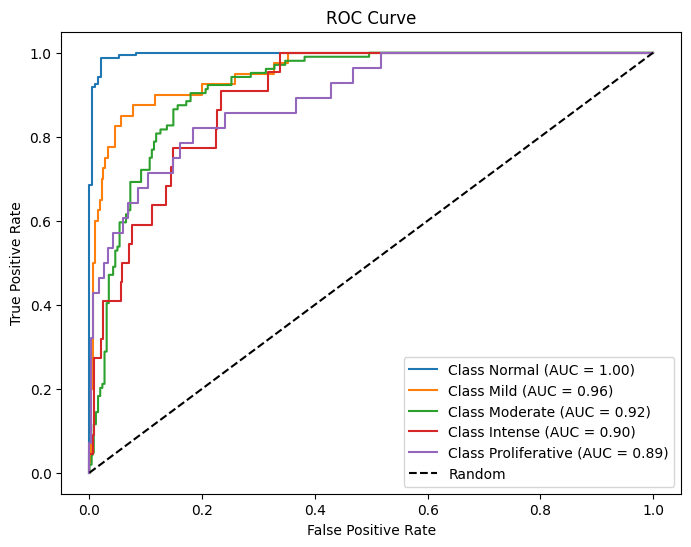

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the validation data

# Predict probabilities for each class using validation data
y_pred_probs = model.predict([x_valid_vgg19_features, x_valid_resnet50_features])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):  # Assuming 5 classes
    fpr[i], tpr[i], _ = roc_curve(y_valid, y_pred_probs[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
l=['Normal','Mild','Moderate','Intense','Proliferative']
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {l[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


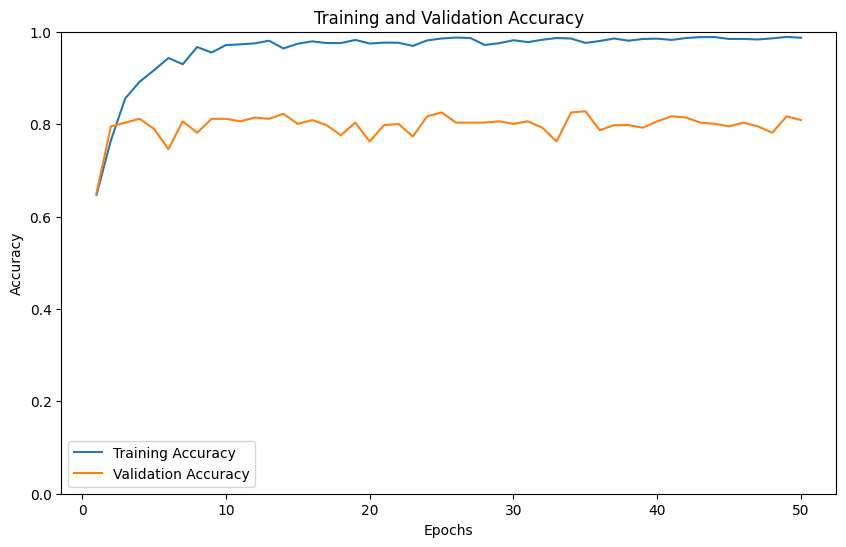

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from the 'fit' method of your model

# Extract accuracy and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extract the number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc,  label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

plt.show()


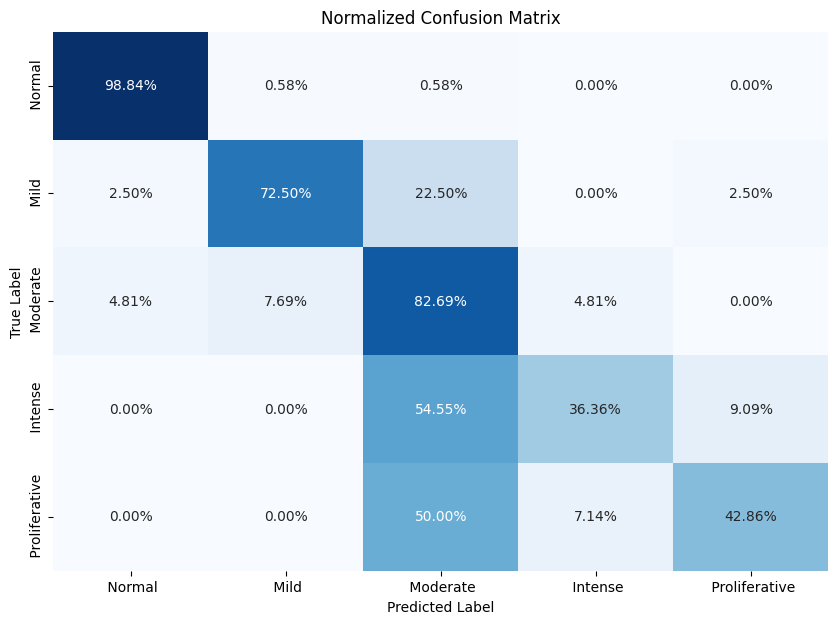

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

# Assuming you already have a model and validation data prepared
# Predict classes

y_pred_classes = np.argmax(y_pred_probs, axis=1)

# If your y_val is in one-hot encoded format, convert it back to class indices
y_true = np.argmax(y_valid, axis=1) if y_valid.ndim > 1 else y_valid

# Compute the confusion matrix
cm = confusion_matrix(y_valid, y_pred_classes)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
l=['Normal','Mild','Moderate','Intense','Proliferative']

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', cbar=False,
            xticklabels=[f' {l[i]}' for i in range(cm.shape[1])],
            yticklabels=[f' {l[i]}' for i in range(cm.shape[0])])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_classes,y_true))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       176
           1       0.72      0.76      0.74        38
           2       0.83      0.70      0.76       122
           3       0.36      0.53      0.43        15
           4       0.43      0.80      0.56        15

    accuracy                           0.83       366
   macro avg       0.67      0.75      0.69       366
weighted avg       0.86      0.83      0.84       366



In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, ActivityRegularization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1

# Load your previously prepared combined features
# Assuming x_train_combined, x_val_combined
x_train_combined = np.hstack((x_train_vgg19_features, x_train_resnet50_features))
x_val_combined = np.hstack((x_val_vgg19_features, x_val_resnet50_features))
# Step 1: Define the Sparse Autoencoder
input_shape = x_train_combined.shape[1]
input_layer = Input(shape=(input_shape,))
# Encoder
encoded = Dense(256, activation='relu', activity_regularizer=l1(1e-5))(input_layer)  # Sparse representation
# Decoder
decoded = Dense(input_shape, activation='sigmoid')(encoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Step 2: Train Autoencoder
autoencoder.fit(x_train_combined, x_train_combined,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val_combined, x_val_combined))

# Step 3: Define Encoder Model for Feature Extraction
encoder = Model(inputs=input_layer, outputs=encoded)

# Extract Encoded Features
x_train_encoded = encoder.predict(x_train_combined)
x_val_encoded = encoder.predict(x_val_combined)

# Step 4: Train a DNN with the Encoded Features
dnn_model = Sequential([
    Dense(512, activation='relu', input_shape=(256,)),  # Adjust input shape based on encoder output
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train DNN
history = dnn_model.fit(
    x_train_encoded, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val_encoded, y_val)
)


Epoch 1/50
12/12 [==============================] - 6s 307ms/step - loss: 7.0372 - val_loss: 6.9540
Epoch 2/50
12/12 [==============================] - 3s 278ms/step - loss: 6.9305 - val_loss: 6.9059
Epoch 3/50
12/12 [==============================] - 4s 309ms/step - loss: 6.8895 - val_loss: 6.8752
Epoch 4/50
12/12 [==============================] - 3s 247ms/step - loss: 6.8666 - val_loss: 6.8617
Epoch 5/50
12/12 [==============================] - 3s 252ms/step - loss: 6.8565 - val_loss: 6.8553
Epoch 6/50
12/12 [==============================] - 3s 212ms/step - loss: 6.8512 - val_loss: 6.8515
Epoch 7/50
12/12 [==============================] - 3s 240ms/step - loss: 6.8478 - val_loss: 6.8490
Epoch 8/50
12/12 [==============================] - 4s 347ms/step - loss: 6.8452 - val_loss: 6.8471
Epoch 9/50
12/12 [==============================] - 3s 231ms/step - loss: 6.8431 - val_loss: 6.8455
Epoch 10/50
12/12 [==============================] - 2s 213ms/step - loss: 6.8412 - val_loss: 6.8440

In [ ]:
x_valid_combined = np.hstack((x_valid_vgg19_features, x_valid_resnet50_features))
x_valid_encoded = encoder.predict(x_valid_combined)
dnn_model.evaluate(x_valid_encoded, y_valid)

12/12 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.7678


[0.6008691191673279, 0.7677595615386963]

In [ ]:
dnn_model = Sequential([
    Dense(512, activation='relu', input_shape=(256,)),  # 1st hidden layer
    Dense(256, activation='relu'),  # 2nd hidden layer
    Dense(128, activation='relu'),  # 3rd hidden layer
    Dense(64, activation='relu'),   # 4th hidden layer
    Dense(32, activation='relu'),   # 5th hidden layer
    Dense(5, activation='softmax')  # Output layer
])
dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train DNN
history = dnn_model.fit(
    x_train_encoded, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val_encoded, y_val)
)

Epoch 1/50
92/92 [==============================] - 3s 9ms/step - loss: 0.8575 - accuracy: 0.7102 - val_loss: 0.6726 - val_accuracy: 0.7514
Epoch 2/50
92/92 [==============================] - 1s 7ms/step - loss: 0.6882 - accuracy: 0.7471 - val_loss: 0.6420 - val_accuracy: 0.7678
Epoch 3/50
92/92 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.7563 - val_loss: 0.6684 - val_accuracy: 0.7732
Epoch 4/50
92/92 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.7652 - val_loss: 0.6272 - val_accuracy: 0.7514
Epoch 5/50
92/92 [==============================] - 0s 5ms/step - loss: 0.6118 - accuracy: 0.7666 - val_loss: 0.6354 - val_accuracy: 0.7705
Epoch 6/50
92/92 [==============================] - 0s 4ms/step - loss: 0.5883 - accuracy: 0.7761 - val_loss: 0.6284 - val_accuracy: 0.7623
Epoch 7/50
92/92 [==============================] - 0s 5ms/step - loss: 0.5652 - accuracy: 0.7853 - val_loss: 0.6123 - val_accuracy: 0.7842
Epoch 8/50
92/92 [==

In [ ]:
dnn_model.evaluate(x_valid_encoded, y_valid)

12/12 [==============================] - 0s 3ms/step - loss: 1.4056 - accuracy: 0.7158


[1.4056073427200317, 0.7158470153808594]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
BATCH_SIZE=16
# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers
dense_1 = Dense(512, activation='relu')(input_vgg19)
dense_2 = Dense(256, activation='relu')(dense_1)
dense_3 = Dense(256, activation='relu')(dense_2)
dense_03 = Dense(128, activation='relu')(dense_3)
# Cross-pooling layer to combine VGG19 and ResNet50 features
cross_pooled = Concatenate()([dense_1, input_resnet50])

dense_4 = Dense(128, activation='relu')(cross_pooled)
dense_04 = Dense(64, activation='relu')(dense_4)
dense_5 = Dense(32, activation='relu')(dense_04)
output = Dense(5, activation='softmax')(dense_5)

# Create the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] / BATCH_SIZE,batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
183/183 [==============================] - 6s 16ms/step - loss: 2.4506 - accuracy: 0.6679 - val_loss: 1.0847 - val_accuracy: 0.7596
Epoch 2/50
183/183 [==============================] - 3s 15ms/step - loss: 0.5418 - accuracy: 0.8215 - val_loss: 0.6997 - val_accuracy: 0.7978
Epoch 3/50
183/183 [==============================] - 3s 16ms/step - loss: 0.3630 - accuracy: 0.8792 - val_loss: 0.9638 - val_accuracy: 0.7923
Epoch 4/50
183/183 [==============================] - 2s 13ms/step - loss: 0.2309 - accuracy: 0.9205 - val_loss: 1.0066 - val_accuracy: 0.8169
Epoch 5/50
183/183 [==============================] - 2s 14ms/step - loss: 0.2180 - accuracy: 0.9307 - val_loss: 0.9070 - val_accuracy: 0.7814
Epoch 6/50
183/183 [==============================] - 2s 13ms/step - loss: 0.1724 - accuracy: 0.9512 - val_loss: 0.9216 - val_accuracy: 0.7923
Epoch 7/50
183/183 [==============================] - 2s 14ms/step - loss: 0.1240 - accuracy: 0.9625 - val_loss: 1.0250 - val_accuracy: 0.8115

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs

12/12 [==============================] - 0s 12ms/step - loss: 1.1736 - accuracy: 0.8333


[1.1735895872116089, 0.8333333134651184]

In [ ]:
model.save('multi_model.keras')

In [ ]:
!mkdir -p saved_model
model.save('saved_model/multi_model')

In [ ]:
new_model = tf.keras.models.load_model('saved_model/multi_model')
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 25088)]              0         []                            
                                                                                                  
 dense (Dense)               (None, 512)                  1284556   ['input_1[0][0]']             
                                                          8                                       
                                                                                                  
 input_2 (InputLayer)        [(None, 100352)]             0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 100864)               0         ['dense[0][0]',           

In [ ]:
model.save('multi_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
BATCH_SIZE = 16

# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers for VGG19 pathway
dense_1 = Dense(512, activation='relu')(input_vgg19)
bn1 = BatchNormalization()(dense_1)
dropout1 = Dropout(0.25)(bn1)  # Dropout rate of 50%

dense_2 = Dense(256, activation='relu')(dropout1)

dropout2 = Dropout(0.25)(dense_2)  # Consistent dropout rate


# Concatenate VGG19 processed features with ResNet50 features
cross_pooled = Concatenate()([dropout2, input_resnet50])

# Further processing after concatenation
dense_4 = Dense(128, activation='relu')(cross_pooled)
bn4 = BatchNormalization()(dense_4)
dropout4 = Dropout(0.25)(bn4)


# Final output layer
output = Dense(5, activation='softmax')(dropout4)

# Create and compile the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] // BATCH_SIZE,
    batch_size=BATCH_SIZE,
    epochs=100,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/100
183/183 [==============================] - 8s 24ms/step - loss: 0.8275 - accuracy: 0.7176 - val_loss: 0.6280 - val_accuracy: 0.7978
Epoch 2/100
183/183 [==============================] - 3s 14ms/step - loss: 0.4581 - accuracy: 0.8411 - val_loss: 0.6171 - val_accuracy: 0.7869
Epoch 3/100
183/183 [==============================] - 3s 14ms/step - loss: 0.3074 - accuracy: 0.8926 - val_loss: 0.5858 - val_accuracy: 0.8197
Epoch 4/100
183/183 [==============================] - 3s 14ms/step - loss: 0.2153 - accuracy: 0.9375 - val_loss: 0.6043 - val_accuracy: 0.8251
Epoch 5/100
183/183 [==============================] - 3s 16ms/step - loss: 0.1381 - accuracy: 0.9640 - val_loss: 0.6981 - val_accuracy: 0.8060
Epoch 6/100
183/183 [==============================] - 3s 16ms/step - loss: 0.1319 - accuracy: 0.9633 - val_loss: 0.7846 - val_accuracy: 0.7623
Epoch 7/100
183/183 [==============================] - 3s 14ms/step - loss: 0.1067 - accuracy: 0.9715 - val_loss: 0.7541 - val_accuracy:

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs  remving 1 layer from 4 layers

12/12 [==============================] - 0s 9ms/step - loss: 0.9390 - accuracy: 0.8115


[0.939001202583313, 0.811475396156311]

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs removing 1bn of 3 layers

12/12 [==============================] - 0s 9ms/step - loss: 0.8601 - accuracy: 0.8251


[0.8601483702659607, 0.8251366019248962]

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs removing 2bn of 3 layers

12/12 [==============================] - 0s 11ms/step - loss: 1.9852 - accuracy: 0.7760


[1.9851961135864258, 0.7759562730789185]

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #50 epochs removing 1bn,1dp of 3 layers

12/12 [==============================] - 0s 9ms/step - loss: 0.8148 - accuracy: 0.8142


[0.8148192763328552, 0.8142076730728149]

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)    #100 epochs removing 1bn of 3 layers

12/12 [==============================] - 0s 12ms/step - loss: 0.7994 - accuracy: 0.8279


[0.7994113564491272, 0.8278688788414001]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
BATCH_SIZE = 16

# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers for VGG19 pathway
dense_1 = Dense(512, activation='relu')(input_vgg19)
bn1 = BatchNormalization()(dense_1)
dropout1 = Dropout(0.25)(bn1)  # Dropout rate of 50%

dense_2 = Dense(256, activation='relu')(dropout1)
bn2 = BatchNormalization()(dense_2)
dropout2 = Dropout(0.25)(bn2)  # Consistent dropout rate

dense_3 = Dense(128, activation='relu')(dropout2)
bn3 = BatchNormalization()(dense_3)
dropout3 = Dropout(0.25)(bn3)

# Concatenate VGG19 processed features with ResNet50 features
cross_pooled = Concatenate()([dropout3, input_resnet50])

# Further processing after concatenation
dense_4 = Dense(64, activation='relu')(cross_pooled)
bn4 = BatchNormalization()(dense_4)
dropout4 = Dropout(0.25)(bn4)

dense_5 = Dense(32, activation='relu')(dropout4)
bn5 = BatchNormalization()(dense_5)
dropout5 = Dropout(0.25)(bn5)

# Final output layer
output = Dense(5, activation='softmax')(dropout5)

# Create and compile the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] // BATCH_SIZE,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
183/183 [==============================] - 11s 19ms/step - loss: 0.9881 - accuracy: 0.6352 - val_loss: 0.6002 - val_accuracy: 0.7705
Epoch 2/50
183/183 [==============================] - 3s 19ms/step - loss: 0.6525 - accuracy: 0.7563 - val_loss: 0.5611 - val_accuracy: 0.7923
Epoch 3/50
183/183 [==============================] - 3s 15ms/step - loss: 0.5124 - accuracy: 0.8171 - val_loss: 0.5732 - val_accuracy: 0.8087
Epoch 4/50
183/183 [==============================] - 3s 15ms/step - loss: 0.4346 - accuracy: 0.8469 - val_loss: 0.5537 - val_accuracy: 0.8142
Epoch 5/50
183/183 [==============================] - 3s 15ms/step - loss: 0.3510 - accuracy: 0.8785 - val_loss: 0.5921 - val_accuracy: 0.8169
Epoch 6/50
183/183 [==============================] - 3s 16ms/step - loss: 0.2840 - accuracy: 0.9005 - val_loss: 0.6705 - val_accuracy: 0.8005
Epoch 7/50
183/183 [==============================] - 3s 17ms/step - loss: 0.2561 - accuracy: 0.9156 - val_loss: 0.6138 - val_accuracy: 0.795

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid) # 5layers, 0.5dp

12/12 [==============================] - 0s 10ms/step - loss: 0.8439 - accuracy: 0.8197


[0.8438794016838074, 0.8196721076965332]

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid) # 5layers, 0.25dp

12/12 [==============================] - 0s 9ms/step - loss: 1.0716 - accuracy: 0.8060


[1.0715835094451904, 0.806010901927948]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
BATCH_SIZE = 16

# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers for VGG19 pathway
dense_1 = Dense(512, activation='relu')(input_vgg19)
bn1 = BatchNormalization()(dense_1)

dense_2 = Dense(256, activation='relu')(bn1)
bn2 = BatchNormalization()(dense_2)

dense_3 = Dense(128, activation='relu')(bn2)
bn3 = BatchNormalization()(dense_3)

# Concatenate VGG19 processed features with ResNet50 features
cross_pooled = Concatenate()([bn3, input_resnet50])

# Further processing after concatenation
dense_4 = Dense(64, activation='relu')(cross_pooled)
bn4 = BatchNormalization()(dense_4)

dense_5 = Dense(32, activation='relu')(bn4)
bn5 = BatchNormalization()(dense_5)

# Final output layer
output = Dense(5, activation='softmax')(bn5)

# Create and compile the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] // BATCH_SIZE,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
183/183 [==============================] - 10s 28ms/step - loss: 0.8105 - accuracy: 0.7179 - val_loss: 0.6330 - val_accuracy: 0.7732
Epoch 2/50
183/183 [==============================] - 5s 26ms/step - loss: 0.4531 - accuracy: 0.8401 - val_loss: 0.6208 - val_accuracy: 0.7650
Epoch 3/50
183/183 [==============================] - 4s 23ms/step - loss: 0.3172 - accuracy: 0.8977 - val_loss: 0.7834 - val_accuracy: 0.7650
Epoch 4/50
183/183 [==============================] - 4s 21ms/step - loss: 0.2127 - accuracy: 0.9369 - val_loss: 0.6849 - val_accuracy: 0.7923
Epoch 5/50
183/183 [==============================] - 3s 19ms/step - loss: 0.1632 - accuracy: 0.9502 - val_loss: 0.7366 - val_accuracy: 0.7842
Epoch 6/50
183/183 [==============================] - 3s 19ms/step - loss: 0.1422 - accuracy: 0.9571 - val_loss: 0.7397 - val_accuracy: 0.8005
Epoch 7/50
183/183 [==============================] - 3s 14ms/step - loss: 0.1445 - accuracy: 0.9502 - val_loss: 0.7244 - val_accuracy: 0.827

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid) # no-dp,5bn

12/12 [==============================] - 0s 12ms/step - loss: 1.0787 - accuracy: 0.8087


[1.0787054300308228, 0.8087431788444519]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
BATCH_SIZE = 16

# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers for VGG19 pathway
dense_1 = Dense(512, activation='relu')(input_vgg19)
bn1 = BatchNormalization()(dense_1)

dense_2 = Dense(256, activation='relu')(bn1)
bn2 = BatchNormalization()(dense_2)



# Concatenate VGG19 processed features with ResNet50 features
cross_pooled = Concatenate()([bn2, input_resnet50])

# Further processing after concatenation
dense_4 = Dense(128, activation='relu')(cross_pooled)
bn4 = BatchNormalization()(dense_4)


# Final output layer
output = Dense(5, activation='softmax')(bn4)

# Create and compile the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] // BATCH_SIZE,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
183/183 [==============================] - 5s 18ms/step - loss: 0.7578 - accuracy: 0.7391 - val_loss: 0.6014 - val_accuracy: 0.7978
Epoch 2/50
183/183 [==============================] - 3s 15ms/step - loss: 0.3870 - accuracy: 0.8734 - val_loss: 0.8223 - val_accuracy: 0.7896
Epoch 3/50
183/183 [==============================] - 3s 17ms/step - loss: 0.2479 - accuracy: 0.9176 - val_loss: 0.6482 - val_accuracy: 0.8142
Epoch 4/50
183/183 [==============================] - 4s 20ms/step - loss: 0.1636 - accuracy: 0.9550 - val_loss: 0.6078 - val_accuracy: 0.8169
Epoch 5/50
183/183 [==============================] - 4s 20ms/step - loss: 0.1319 - accuracy: 0.9623 - val_loss: 0.7073 - val_accuracy: 0.8251
Epoch 6/50
183/183 [==============================] - 3s 19ms/step - loss: 0.1101 - accuracy: 0.9715 - val_loss: 0.7047 - val_accuracy: 0.8251
Epoch 7/50
183/183 [==============================] - 4s 20ms/step - loss: 0.0922 - accuracy: 0.9791 - val_loss: 1.1297 - val_accuracy: 0.7131

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)   # 3 layers,no-dp,3 bn

12/12 [==============================] - 0s 10ms/step - loss: 0.7696 - accuracy: 0.8279


[0.7695798873901367, 0.8278688788414001]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
BATCH_SIZE = 16

# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers for VGG19 pathway
dense_1 = Dense(512, activation='relu')(input_vgg19)

dense_2 = Dense(256, activation='relu')(dense_1)



# Concatenate VGG19 processed features with ResNet50 features
cross_pooled = Concatenate()([dense_2, input_resnet50])

# Further processing after concatenation
dense_4 = Dense(128, activation='relu')(cross_pooled)


# Final output layer
output = Dense(5, activation='softmax')(dense_4)

# Create and compile the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] // BATCH_SIZE,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
183/183 [==============================] - 5s 16ms/step - loss: 4.8095 - accuracy: 0.6861 - val_loss: 1.9669 - val_accuracy: 0.7678
Epoch 2/50
183/183 [==============================] - 3s 15ms/step - loss: 1.1158 - accuracy: 0.8264 - val_loss: 1.7674 - val_accuracy: 0.7896
Epoch 3/50
183/183 [==============================] - 3s 15ms/step - loss: 0.4844 - accuracy: 0.8936 - val_loss: 1.3367 - val_accuracy: 0.8087
Epoch 4/50
183/183 [==============================] - 2s 13ms/step - loss: 0.2387 - accuracy: 0.9338 - val_loss: 1.7982 - val_accuracy: 0.8033
Epoch 5/50
183/183 [==============================] - 2s 13ms/step - loss: 0.1895 - accuracy: 0.9581 - val_loss: 1.6230 - val_accuracy: 0.8169
Epoch 6/50
183/183 [==============================] - 2s 13ms/step - loss: 0.1782 - accuracy: 0.9571 - val_loss: 1.4209 - val_accuracy: 0.8087
Epoch 7/50
183/183 [==============================] - 2s 13ms/step - loss: 0.1438 - accuracy: 0.9623 - val_loss: 1.3951 - val_accuracy: 0.8005

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)

12/12 [==============================] - 0s 10ms/step - loss: 1.7160 - accuracy: 0.8142


[1.716017723083496, 0.8142076730728149]

In [ ]:
x_train_vgg19_features=np.load("/content/drive/MyDrive/aptos 2019/vgg19_X_train.npy")
x_val_vgg19_features=np.load("/content/drive/MyDrive/aptos 2019/vgg19_X_val.npy")

In [ ]:
x_train=np.load("/content/drive/MyDrive/aptos 2019/X_train1.npy")
x_test=np.load("/content/drive/MyDrive/aptos 2019/X_val.npy")
x_valid=np.load('/content/drive/MyDrive/aptos 2019/X_valid.npy')

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras import backend as K
from keras.layers import Input, Dense, Lambda
x_train_flattened = x_train.reshape((x_train.shape[0], -1))
x_test_flattened = x_test.reshape((x_test.shape[0], -1))
x_valid_flattened = x_test.reshape((x_valid.shape[0], -1))
# Define and train an undercomplete autoencoder
encoder = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_flattened.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu')  # Set bottleneck layer size to 32
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(32,)),  # Reverse the bottleneck layer size
    Dense(128, activation='relu'),
    Dense(x_train_flattened.shape[1], activation='relu')
])

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train_flattened, x_train_flattened, epochs=30, batch_size=32, validation_split=0.2)

# Extract features using the trained autoencoder
encoded_train_features = encoder.predict(x_train_flattened)
encoded_test_features = encoder.predict(x_test_flattened)
encoded_valid_features = encoder.predict(x_valid_flattened)

Epoch 1/30
74/74 [==============================] - 9s 64ms/step - loss: 4323.3120 - val_loss: 2643.0481
Epoch 2/30
74/74 [==============================] - 3s 43ms/step - loss: 2402.8337 - val_loss: 2113.4807
Epoch 3/30
74/74 [==============================] - 3s 38ms/step - loss: 1968.6752 - val_loss: 1781.9331
Epoch 4/30
74/74 [==============================] - 3s 37ms/step - loss: 1705.4103 - val_loss: 1586.3650
Epoch 5/30
74/74 [==============================] - 3s 37ms/step - loss: 1522.5565 - val_loss: 1394.6516
Epoch 6/30
74/74 [==============================] - 3s 43ms/step - loss: 1288.7338 - val_loss: 1149.7528
Epoch 7/30
74/74 [==============================] - 3s 40ms/step - loss: 1070.1783 - val_loss: 984.6068
Epoch 8/30
74/74 [==============================] - 3s 38ms/step - loss: 948.7878 - val_loss: 894.3138
Epoch 9/30
74/74 [==============================] - 3s 40ms/step - loss: 878.7494 - val_loss: 835.3732
Epoch 10/30
74/74 [==============================] - 3s 41ms

In [ ]:
from tensorflow.keras.applications import DenseNet121, MobileNetV2
import numpy as np

# Load DenseNet121 and MobileNetV2 with pre-trained ImageNet weights
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def extract_features(model, x_data):
    features = model.predict(x_data, batch_size=32, verbose=1)
    features_flattened = features.reshape((features.shape[0], -1))
    return features_flattened

# Assuming 'x_valid' is your validation dataset pre-processed to the required input size (224x224)
x_train_densenet_features = extract_features(densenet, x_train)
x_train_mobilenet_features = extract_features(mobilenet, x_train)
x_test_densenet_features = extract_features(densenet, x_test)
x_test_mobilenet_features = extract_features(mobilenet, x_valid)
x_valid_densenet_features = extract_features(densenet, x_valid)
x_valid_mobilenet_features = extract_features(mobilenet, x_valid)
# Combine the features from both models
x_valid_combined = np.hstack((x_valid_densenet_features, x_valid_mobilenet_features))


12/12 [==============================] - 0s 31ms/step


In [ ]:
import numpy as np
np.save("/content/drive/MyDrive/aptos 2019/x_train_densenet_features.npy",x_train_densenet_features)
np.save("/content/drive/MyDrive/aptos 2019/x_train_mobilenet_features.npy",x_train_mobilenet_features)
np.save("/content/drive/MyDrive/aptos 2019/x_test_densenet_features.npy",x_test_densenet_features)
np.save("/content/drive/MyDrive/aptos 2019/x_test_mobilenet_features.npy",x_test_mobilenet_features)
np.save("/content/drive/MyDrive/aptos 2019/x_valid_densenet_features.npy",x_valid_densenet_features)
np.save("/content/drive/MyDrive/aptos 2019/x_valid_mobilenet_features.npy",x_valid_mobilenet_features)

In [ ]:
x_train_densenet_features=np.load("/content/drive/MyDrive/aptos 2019/x_train_densenet_features.npy")
x_train_mobilenet_features=np.load("/content/drive/MyDrive/aptos 2019/x_train_mobilenet_features.npy")
x_test_densenet_features=np.load("/content/drive/MyDrive/aptos 2019/x_test_densenet_features.npy")
x_test_mobilenet_features=np.load("/content/drive/MyDrive/aptos 2019/x_test_mobilenet_features.npy")
x_valid_densenet_features=np.load("/content/drive/MyDrive/aptos 2019/x_valid_densenet_features.npy")
x_valid_mobilenet_features=np.load("/content/drive/MyDrive/aptos 2019/x_valid_mobilenet_features.npy")

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
BATCH_SIZE=16
# Define input layers for VGG19 and ResNet50 features
input_densenet = Input(shape=(x_train_densenet_features.shape[1],))
input_mobilenet = Input(shape=(x_train_mobilenet_features.shape[1],))

# Define the neural network layers
dense_1 = Dense(512, activation='relu')(input_densenet)
dense_2 = Dense(256, activation='relu')(dense_1)
dense_3 = Dense(256, activation='relu')(dense_2)
dense_03 = Dense(128, activation='relu')(dense_3)
# Cross-pooling layer to combine VGG19 and ResNet50 features
cross_pooled = Concatenate()([dense_1, input_mobilenet])

dense_4 = Dense(128, activation='relu')(cross_pooled)
dense_04 = Dense(64, activation='relu')(dense_4)
dense_5 = Dense(32, activation='relu')(dense_04)
output = Dense(5, activation='softmax')(dense_5)

# Create the model
model = Model(inputs=[input_densenet, input_mobilenet], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_densenet_features, x_train_mobilenet_features], y_train,
    steps_per_epoch=x_train_densenet_features.shape[0] / BATCH_SIZE,batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_test_densenet_features, x_test_mobilenet_features], y_val)
)


Epoch 1/50
183/183 [==============================] - 8s 19ms/step - loss: 1.4943 - accuracy: 0.6461 - val_loss: 0.8703 - val_accuracy: 0.7514
Epoch 2/50
183/183 [==============================] - 3s 16ms/step - loss: 0.7133 - accuracy: 0.7488 - val_loss: 0.9330 - val_accuracy: 0.7568
Epoch 3/50
183/183 [==============================] - 3s 15ms/step - loss: 0.5855 - accuracy: 0.7928 - val_loss: 0.8238 - val_accuracy: 0.7732
Epoch 4/50
183/183 [==============================] - 3s 18ms/step - loss: 0.4455 - accuracy: 0.8321 - val_loss: 0.7122 - val_accuracy: 0.7568
Epoch 5/50
183/183 [==============================] - 3s 16ms/step - loss: 0.3933 - accuracy: 0.8560 - val_loss: 0.8775 - val_accuracy: 0.7568
Epoch 6/50
183/183 [==============================] - 3s 16ms/step - loss: 0.3606 - accuracy: 0.8686 - val_loss: 0.8864 - val_accuracy: 0.7432
Epoch 7/50
183/183 [==============================] - 3s 15ms/step - loss: 0.2874 - accuracy: 0.9003 - val_loss: 1.0468 - val_accuracy: 0.7377

In [ ]:
model.evaluate([x_valid_densenet_features, x_valid_mobilenet_features], y_valid)

12/12 [==============================] - 0s 15ms/step - loss: 1.5661 - accuracy: 0.7213


[1.5661407709121704, 0.7213114500045776]

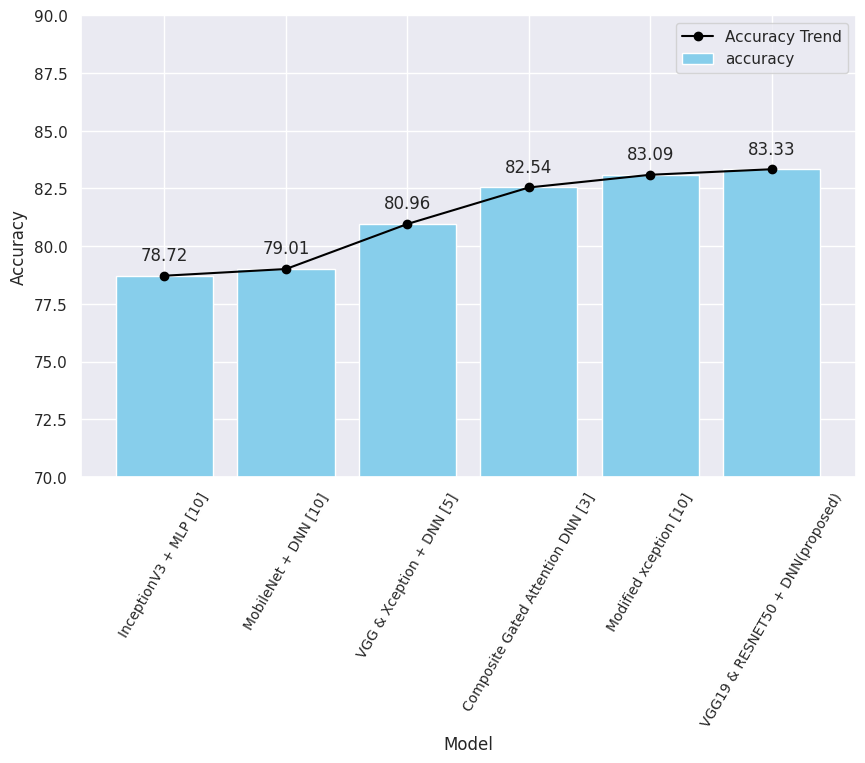

In [ ]:
import pandas as pd
import seaborn as sns
sns.set()
# Create a list of names and scores
names = [ 'InceptionV3 + MLP [10]', 'MobileNet + DNN [10]',
         'VGG & Xception + DNN [5]', 'Composite Gated Attention DNN [3]','Modified xception [10]','VGG19 & RESNET50 + DNN(proposed)']
scores = [78.72, 79.01, 80.96, 82.54,83.09,83.33]

# Create a DataFrame using a dictionary
df = pd.DataFrame({
    'models': names,
    'accuracy': scores
})

# Print the DataFrame

import pandas as pd
import matplotlib.pyplot as plt



# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
bars=plt.bar(df['models'], df['accuracy'], color='skyblue',label='accuracy')  # Create a bar plot
for bar, value in zip(bars, df['accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Model')  # Label on X-axis
plt.ylabel('Accuracy')  # Label on Y-axis
plt.plot(df['models'], df['accuracy'], marker='o', color='black', label='Accuracy Trend')
plt.xticks(rotation=60)
plt.xticks(fontsize=10)
plt.legend()  # Show the legend
plt.ylim(70, 90)  # Limit for Y-axis (optional)
plt.show()


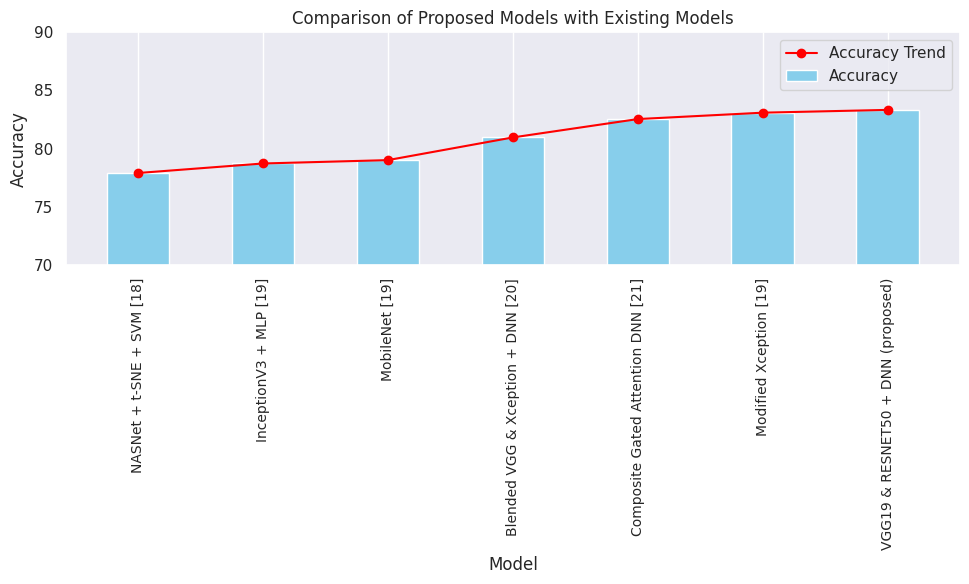

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
names = ['NASNet + t-SNE + SVM [18]', 'InceptionV3 + MLP [19]', 'MobileNet [19]',
         'Blended VGG & Xception + DNN [20]', 'Composite Gated Attention DNN [21]',
         'Modified Xception [19]', 'VGG19 & RESNET50 + DNN (proposed)']
scores = [77.90, 78.72, 79.01, 80.96, 82.54, 83.09, 83.33]
df = pd.DataFrame({'models': names, 'accuracy': scores})

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

# Bar plot
plt.bar(df['models'], df['accuracy'], color='skyblue', label='Accuracy', width=0.5)

# Line plot
plt.plot(df['models'], df['accuracy'], marker='o', color='red', label='Accuracy Trend')

# Customize the plot

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90, fontsize=10)
plt.title('Comparison of Proposed Models with Existing Models')
plt.ylim(70, 90)  # Limit for Y-axis (optional)
plt.legend()  # Show the legend
plt.grid(axis='y')  # Show grid lines on the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()


In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
BATCH_SIZE=16
# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers
dense_1 = Dense(512, activation='relu')(input_vgg19)
cross_pooled = Concatenate()([dense_1, input_resnet50])
dense_2 = Dense(128, activation='relu')(cross_pooled)
dense_3 = Dense(64, activation='relu')(dense_2)
dense_4 = Dense(32, activation='relu')(dense_3)
output = Dense(5, activation='softmax')(dense_4)

# Create the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=x_train_vgg19_features.shape[0] / BATCH_SIZE,batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
183/183 [==============================] - 6s 17ms/step - loss: 1.8895 - accuracy: 0.6853 - val_loss: 1.2848 - val_accuracy: 0.7377
Epoch 2/50
183/183 [==============================] - 3s 16ms/step - loss: 0.5206 - accuracy: 0.8358 - val_loss: 0.8778 - val_accuracy: 0.8005
Epoch 3/50
183/183 [==============================] - 2s 13ms/step - loss: 0.3538 - accuracy: 0.8775 - val_loss: 0.6443 - val_accuracy: 0.8115
Epoch 4/50
183/183 [==============================] - 2s 13ms/step - loss: 0.2215 - accuracy: 0.9229 - val_loss: 0.8629 - val_accuracy: 0.7869
Epoch 5/50
183/183 [==============================] - 2s 13ms/step - loss: 0.2962 - accuracy: 0.9119 - val_loss: 0.8648 - val_accuracy: 0.7732
Epoch 6/50
183/183 [==============================] - 2s 14ms/step - loss: 0.2051 - accuracy: 0.9386 - val_loss: 0.8607 - val_accuracy: 0.7596
Epoch 7/50
183/183 [==============================] - 3s 17ms/step - loss: 0.1370 - accuracy: 0.9618 - val_loss: 1.3280 - val_accuracy: 0.7596

In [ ]:
(model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)

12/12 [==============================] - 0s 13ms/step - loss: 0.9455 - accuracy: 0.8306


[0.9454805850982666, 0.8306010961532593]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
import numpy as np
BATCH_SIZE=16
# Define input layers for VGG19 and ResNet50 features

x_train_combined = np.hstack((x_train_vgg19_features, x_train_resnet50_features))# Define the neural network layers
x_test_combined = np.hstack((x_val_vgg19_features, x_val_resnet50_features))
input_combine = Input(shape=(x_train_combined.shape[1],))
dense_1 = Dense(512, activation='relu')(input_combine)
dense_2 = Dense(128, activation='relu')(dense_1)
dense_3 = Dense(64, activation='relu')(dense_2)
dense_4 = Dense(32, activation='relu')(dense_3)
output = Dense(5, activation='softmax')(dense_4)

# Create the model
model = Model(inputs=[input_combine], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train_combined, y_train,
    steps_per_epoch=x_train_combined.shape[0] / BATCH_SIZE,batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(x_test_combined, y_val)
)


Epoch 1/50
183/183 [==============================] - 7s 29ms/step - loss: 3.4236 - accuracy: 0.6689 - val_loss: 0.9018 - val_accuracy: 0.7514
Epoch 2/50
183/183 [==============================] - 5s 25ms/step - loss: 0.7516 - accuracy: 0.7904 - val_loss: 0.8846 - val_accuracy: 0.7322
Epoch 3/50
183/183 [==============================] - 6s 31ms/step - loss: 0.4112 - accuracy: 0.8638 - val_loss: 0.9150 - val_accuracy: 0.7650
Epoch 4/50
183/183 [==============================] - 6s 34ms/step - loss: 0.2380 - accuracy: 0.9225 - val_loss: 0.8600 - val_accuracy: 0.7814
Epoch 5/50
183/183 [==============================] - 6s 33ms/step - loss: 0.1718 - accuracy: 0.9454 - val_loss: 0.8198 - val_accuracy: 0.8115
Epoch 6/50
183/183 [==============================] - 6s 34ms/step - loss: 0.1639 - accuracy: 0.9481 - val_loss: 1.0003 - val_accuracy: 0.7678
Epoch 7/50
183/183 [==============================] - 5s 29ms/step - loss: 0.1493 - accuracy: 0.9549 - val_loss: 1.2027 - val_accuracy: 0.7978

In [ ]:
(x_valid_combined = np.hstack((x_valid_vgg19_features, x_valid_resnet50_features))
model.evaluate(x_valid_combined,y_valid)

12/12 [==============================] - 0s 13ms/step - loss: 0.8375 - accuracy: 0.7869


[0.8375318646430969, 0.7868852615356445]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model

BATCH_SIZE = 16

# Assuming x_train_vgg19_features and x_train_resnet50_features are your training datasets from VGG19 and ResNet50
# Similarly for x_val_vgg19_features and x_val_resnet50_features for validation datasets
# These should be loaded or defined earlier in your code

# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Concatenate features
concatenated_features = Concatenate()([input_vgg19, input_resnet50])

# Define the neural network layers
dense_1 = Dense(512, activation='relu')(concatenated_features)
dense_2 = Dense(128, activation='relu')(dense_1)
dense_3 = Dense(64, activation='relu')(dense_2)
dense_4 = Dense(32, activation='relu')(dense_3)
output = Dense(5, activation='softmax')(dense_4)

# Create the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=len(x_train_vgg19_features) / BATCH_SIZE,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
183/183 [==============================] - 8s 30ms/step - loss: 3.3545 - accuracy: 0.6590 - val_loss: 0.7737 - val_accuracy: 0.7678
Epoch 2/50
183/183 [==============================] - 4s 23ms/step - loss: 0.6040 - accuracy: 0.8113 - val_loss: 1.1555 - val_accuracy: 0.6803
Epoch 3/50
183/183 [==============================] - 4s 24ms/step - loss: 0.4452 - accuracy: 0.8539 - val_loss: 0.7049 - val_accuracy: 0.7869
Epoch 4/50
183/183 [==============================] - 5s 25ms/step - loss: 0.2754 - accuracy: 0.9055 - val_loss: 1.0519 - val_accuracy: 0.7732
Epoch 5/50
183/183 [==============================] - 4s 24ms/step - loss: 0.1918 - accuracy: 0.9345 - val_loss: 1.2205 - val_accuracy: 0.6885
Epoch 6/50
183/183 [==============================] - 4s 25ms/step - loss: 0.3841 - accuracy: 0.8928 - val_loss: 0.9329 - val_accuracy: 0.7732
Epoch 7/50
183/183 [==============================] - 5s 25ms/step - loss: 0.1161 - accuracy: 0.9635 - val_loss: 0.9758 - val_accuracy: 0.7842

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)

12/12 [==============================] - 0s 12ms/step - loss: 1.2512 - accuracy: 0.8142


[1.2511597871780396, 0.8142076730728149]

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
import numpy as np
BATCH_SIZE=16
# Define input layers for VGG19 and ResNet50 features

x_train_combined = np.concatenate((x_train_vgg19_features, x_train_resnet50_features),axis=1)# Define the neural network layers
x_test_combined = np.concatenate((x_val_vgg19_features, x_val_resnet50_features),axis=1)
input_combine = Input(shape=(x_train_combined.shape[1],))
dense_1 = Dense(512, activation='relu')(input_combine)
dense_2 = Dense(128, activation='relu')(dense_1)
dense_3 = Dense(64, activation='relu')(dense_2)
dense_4 = Dense(32, activation='relu')(dense_3)
output = Dense(5, activation='softmax')(dense_4)

# Create the model
model = Model(inputs=[input_combine], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train_combined, y_train,
    steps_per_epoch=x_train_combined.shape[0] / BATCH_SIZE,batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(x_test_combined, y_val)
)


Epoch 1/50
183/183 [==============================] - 11s 37ms/step - loss: 4.0543 - accuracy: 0.6587 - val_loss: 1.1482 - val_accuracy: 0.7814
Epoch 2/50
183/183 [==============================] - 7s 37ms/step - loss: 0.6795 - accuracy: 0.8051 - val_loss: 0.7495 - val_accuracy: 0.7814
Epoch 3/50
183/183 [==============================] - 6s 35ms/step - loss: 0.3392 - accuracy: 0.8925 - val_loss: 0.7049 - val_accuracy: 0.7842
Epoch 4/50
183/183 [==============================] - 6s 35ms/step - loss: 0.2359 - accuracy: 0.9259 - val_loss: 0.6876 - val_accuracy: 0.8197
Epoch 5/50
183/183 [==============================] - 6s 33ms/step - loss: 0.1999 - accuracy: 0.9331 - val_loss: 1.1134 - val_accuracy: 0.7432
Epoch 6/50
183/183 [==============================] - 6s 34ms/step - loss: 0.1837 - accuracy: 0.9471 - val_loss: 0.8845 - val_accuracy: 0.8005
Epoch 7/50
183/183 [==============================] - 6s 34ms/step - loss: 0.1682 - accuracy: 0.9522 - val_loss: 1.1454 - val_accuracy: 0.789

In [ ]:
x_valid_combined = np.concatenate((x_valid_vgg19_features, x_valid_resnet50_features),axis=1)
model.evaluate(x_valid_combined,y_valid)

12/12 [==============================] - 0s 14ms/step - loss: 1.0973 - accuracy: 0.8279


[1.0972696542739868, 0.8278688788414001]

In [ ]:
x_train=np.load("/content/drive/MyDrive/aptos 2019/X_train1.npy")
x_val=np.load("/content/drive/MyDrive/aptos 2019/X_val.npy")
x_valid=np.load("/content/drive/MyDrive/aptos 2019/X_valid.npy")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19, ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, GlobalMaxPooling2D, Concatenate, Dense
from tensorflow.keras.models import Model

vgg19 = VGG19(weights='imagenet', include_top=False,input_shape=(224,224,3))
resnet50 = ResNet50(weights='imagenet', include_top=False,input_shape=(224,224,3))

vgg19_output = vgg19.output
resnet50_output = resnet50.output
# Apply Global Average Pooling and Global Max Pooling to each model's output
vgg19_avg_pool = GlobalAveragePooling2D()(vgg19_output)
resnet50_avg_pool = GlobalAveragePooling2D()(resnet50_output)
vgg19_max_pool = GlobalMaxPooling2D()(vgg19_output)
resnet50_max_pool = GlobalMaxPooling2D()(resnet50_output)

# Cross-Model Pooling - Average and Max
average_pooled = Concatenate()([vgg19_avg_pool, resnet50_avg_pool])
max_pooled = Concatenate()([vgg19_max_pool, resnet50_max_pool])

# Concatenate the average and max pooling outputs
combined_features = Concatenate()([average_pooled, max_pooled])
input_combine = Input(shape=(combined_features.shape[1],))
dense_1 = Dense(512, activation='relu')(combined_features)
dense_2 = Dense(128, activation='relu')(dense_1)
dense_3 = Dense(64, activation='relu')(dense_2)
dense_4 = Dense(32, activation='relu')(dense_3)
output = Dense(10, activation='softmax')(dense_4)  # Change the number of classes if necessary
# Create the model
final_model = Model(inputs=[vgg19.input, resnet50.input], outputs=output)
final_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training is performed assuming you have the feature arrays prepared similar to x_train_combined
# Note: Ensure that x_train and y_train are formatted correctly and correspond to the extracted features
# and prepared labels.


In [ ]:
BATCH_SIZE=32
history = final_model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    steps_per_epoch=len(x_train_vgg19_features) / BATCH_SIZE,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)

Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model' (type Functional).
    
    Input 0 of layer "conv1_pad" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 100352)
    
    Call arguments received by layer 'model' (type Functional):
      • inputs=('tf.Tensor(shape=(None, 25088), dtype=float32)', 'tf.Tensor(shape=(None, 100352), dtype=float32)')
      • training=True
      • mask=None


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG19, ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, GlobalMaxPooling2D, Concatenate, Dense
from tensorflow.keras.models import Model

# Assuming x_train_vgg and x_train_resnet are your extracted features from VGG19 and ResNet50
# Shape of x_train_vgg: (num_samples, vgg_features)
# Shape of x_train_resnet: (num_samples, resnet_features)

# Define input layers for the extracted features
input_vgg = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet = Input(shape=(x_train_resnet50_features.shape[1],))

# Apply Global Average Pooling and Global Max Pooling to each model's output
vgg_avg_pool = GlobalAveragePooling2D()(input_vgg)
resnet_avg_pool = GlobalAveragePooling2D()(input_resnet)
vgg_max_pool = GlobalMaxPooling2D()(input_vgg)
resnet_max_pool = GlobalMaxPooling2D()(input_resnet)

# Cross-Model Pooling - Average and Max
average_pooled = Concatenate()([vgg_avg_pool, resnet_avg_pool])
max_pooled = Concatenate()([vgg_max_pool, resnet_max_pool])

# Concatenate the average and max pooling outputs
combined_features = Concatenate()([average_pooled, max_pooled])

# Adding dense layers for classification
dense_1 = Dense(512, activation='relu')(combined_features)
dense_2 = Dense(128, activation='relu')(dense_1)
dense_3 = Dense(64, activation='relu')(dense_2)
dense_4 = Dense(32, activation='relu')(dense_3)
output = Dense(10, activation='softmax')(dense_4)  # Assuming 10 classes for classification

# Create the model
model = Model(inputs=[input_vgg, input_resnet], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (assuming you have corresponding y_train for labels)
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    batch_size=16,
    epochs=50,
   validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


ValueError: Input 0 of layer "global_average_pooling2d_2" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 25088)

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG19, ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, GlobalMaxPooling2D, Concatenate, Dense
from tensorflow.keras.models import Model

# Assuming x_train_vgg19_features and x_train_resnet50_features are your extracted features from VGG19 and ResNet50
# Shape of x_train_vgg19_features: (num_samples, height, width, channels)
# Shape of x_train_resnet50_features: (num_samples, height, width, channels)

# Define input layers for the extracted features
input_vgg = Input(shape=(x_train_vgg19_features.shape[1:]))  # Assuming shape is (height, width, channels)
input_resnet = Input(shape=(x_train_resnet50_features.shape[1:]))

# Apply Global Average Pooling and Global Max Pooling to each model's output
vgg_avg_pool = GlobalAveragePooling2D()(input_vgg)
resnet_avg_pool = GlobalAveragePooling2D()(input_resnet)
vgg_max_pool = GlobalMaxPooling2D()(input_vgg)
resnet_max_pool = GlobalMaxPooling2D()(input_resnet)

# Cross-Model Pooling - Average and Max
average_pooled = Concatenate()([vgg_avg_pool, resnet_avg_pool])
max_pooled = Concatenate()([vgg_max_pool, resnet_max_pool])

# Concatenate the average and max pooling outputs
combined_features = Concatenate()([average_pooled, max_pooled])

# Adding dense layers for classification
dense_1 = Dense(512, activation='relu')(combined_features)
dense_2 = Dense(128, activation='relu')(dense_1)
dense_3 = Dense(64, activation='relu')(dense_2)
dense_4 = Dense(32, activation='relu')(dense_3)
output = Dense(10, activation='softmax')(dense_4)  # Assuming 10 classes for classification

# Create the model
model = Model(inputs=[input_vgg, input_resnet], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (assuming you have corresponding y_train for labels)
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    batch_size=16,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


ValueError: Input 0 of layer "global_average_pooling2d_3" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 25088)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(512, activation='relu', input_shape=(x_train_vgg19_features.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Assuming there are 10 classes
])
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_vgg19_features, y_train, epochs=50, batch_size=32, validation_data=(x_val_vgg19_features,y_val))
# To evaluate
test_loss, test_acc = model.evaluate(x_valid_vgg19_features, y_valid)
print('Test accuracy:', test_acc)



Epoch 1/50
92/92 [==============================] - 8s 13ms/step - loss: 16.4030 - accuracy: 0.3167 - val_loss: 1.2240 - val_accuracy: 0.6448
Epoch 2/50
92/92 [==============================] - 1s 9ms/step - loss: 2.1932 - accuracy: 0.3505 - val_loss: 1.2182 - val_accuracy: 0.5437
Epoch 3/50
92/92 [==============================] - 1s 9ms/step - loss: 1.4617 - accuracy: 0.3805 - val_loss: 1.1598 - val_accuracy: 0.5437
Epoch 4/50
92/92 [==============================] - 1s 9ms/step - loss: 1.3336 - accuracy: 0.4812 - val_loss: 1.0033 - val_accuracy: 0.6995
Epoch 5/50
92/92 [==============================] - 1s 8ms/step - loss: 1.2274 - accuracy: 0.5850 - val_loss: 0.9270 - val_accuracy: 0.7240
Epoch 6/50
92/92 [==============================] - 1s 9ms/step - loss: 1.2028 - accuracy: 0.6078 - val_loss: 0.9179 - val_accuracy: 0.7158
Epoch 7/50
92/92 [==============================] - 1s 8ms/step - loss: 1.1588 - accuracy: 0.6212 - val_loss: 0.9035 - val_accuracy: 0.7295
Epoch 8/50
92/92 [

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(512, activation='relu', input_shape=(x_train_vgg19_features.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # Assuming there are 10 classes
])
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_vgg19_features, y_train, epochs=50, batch_size=32, validation_data=(x_val_vgg19_features,y_val))
# To evaluate
test_loss, test_acc = model.evaluate(x_valid_vgg19_features, y_valid)
print('Test accuracy:', test_acc)



Epoch 1/50
92/92 [==============================] - 4s 16ms/step - loss: 1.8665 - accuracy: 0.6655 - val_loss: 1.2685 - val_accuracy: 0.5874
Epoch 2/50
92/92 [==============================] - 1s 11ms/step - loss: 0.5892 - accuracy: 0.7843 - val_loss: 0.6397 - val_accuracy: 0.7732
Epoch 3/50
92/92 [==============================] - 1s 10ms/step - loss: 0.3514 - accuracy: 0.8669 - val_loss: 0.6284 - val_accuracy: 0.7842
Epoch 4/50
92/92 [==============================] - 1s 8ms/step - loss: 0.2588 - accuracy: 0.9137 - val_loss: 0.6907 - val_accuracy: 0.7814
Epoch 5/50
92/92 [==============================] - 1s 10ms/step - loss: 0.2278 - accuracy: 0.9215 - val_loss: 0.8202 - val_accuracy: 0.7814
Epoch 6/50
92/92 [==============================] - 1s 10ms/step - loss: 0.2403 - accuracy: 0.9164 - val_loss: 0.8335 - val_accuracy: 0.7787
Epoch 7/50
92/92 [==============================] - 1s 10ms/step - loss: 0.1535 - accuracy: 0.9491 - val_loss: 0.9304 - val_accuracy: 0.7678
Epoch 8/50
92/

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(512, activation='relu', input_shape=(x_train_resnet50_features.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # Assuming there are 10 classes
])
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_resnet50_features, y_train, epochs=50, batch_size=32, validation_data=(x_val_resnet50_features,y_val))
# To evaluate
test_loss, test_acc = model.evaluate(x_valid_resnet50_features, y_valid)
print('Test accuracy:', test_acc)



Epoch 1/50
92/92 [==============================] - 5s 30ms/step - loss: 1.9543 - accuracy: 0.6468 - val_loss: 0.7748 - val_accuracy: 0.7705
Epoch 2/50
92/92 [==============================] - 2s 26ms/step - loss: 0.6470 - accuracy: 0.7867 - val_loss: 0.7703 - val_accuracy: 0.7623
Epoch 3/50
92/92 [==============================] - 3s 31ms/step - loss: 0.3803 - accuracy: 0.8631 - val_loss: 0.6281 - val_accuracy: 0.7978
Epoch 4/50
92/92 [==============================] - 2s 24ms/step - loss: 0.2301 - accuracy: 0.9249 - val_loss: 0.6197 - val_accuracy: 0.8197
Epoch 5/50
92/92 [==============================] - 2s 24ms/step - loss: 0.1782 - accuracy: 0.9403 - val_loss: 0.7147 - val_accuracy: 0.7923
Epoch 6/50
92/92 [==============================] - 2s 24ms/step - loss: 0.1342 - accuracy: 0.9625 - val_loss: 0.7727 - val_accuracy: 0.8115
Epoch 7/50
92/92 [==============================] - 2s 25ms/step - loss: 0.0935 - accuracy: 0.9717 - val_loss: 0.8130 - val_accuracy: 0.8115
Epoch 8/50
92

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# x_train_vgg19_features and x_train_resnet50_features must have the same number of samples and feature length
x_train_combined = np.concatenate([x_train_vgg19_features, x_train_resnet50_features],axis=1)
x_val_combined = np.concatenate([x_val_vgg19_features, x_val_resnet50_features],axis=1)

# Assuming both feature sets are the same size and the size is known
input_shape = x_train_combined.shape[1]  # or x_train_resnet50_features.shape[1], as they should be equal

model = Sequential([
    Dense(512, activation='relu', input_shape=(input_shape,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # Update: Assuming there are 5 classes
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_combined, y_train, epochs=50, batch_size=32, validation_data=(x_val_combined,y_val))
# Assuming x_test_vgg19_features and x_test_resnet50_features are prepared similarly
x_valid_combined = np.concatenate([x_valid_vgg19_features, x_valid_resnet50_features],axis=1)

test_loss, test_acc = model.evaluate(x_valid_combined, y_valid)
print('Test accuracy:', test_acc)


Epoch 1/50
92/92 [==============================] - 7s 36ms/step - loss: 3.9964 - accuracy: 0.6461 - val_loss: 1.3525 - val_accuracy: 0.6503
Epoch 2/50
92/92 [==============================] - 3s 35ms/step - loss: 0.7860 - accuracy: 0.7980 - val_loss: 1.7982 - val_accuracy: 0.6667
Epoch 3/50
92/92 [==============================] - 3s 32ms/step - loss: 0.4807 - accuracy: 0.8621 - val_loss: 0.7911 - val_accuracy: 0.7787
Epoch 4/50
92/92 [==============================] - 3s 30ms/step - loss: 0.2453 - accuracy: 0.9150 - val_loss: 0.7275 - val_accuracy: 0.8169
Epoch 5/50
92/92 [==============================] - 3s 30ms/step - loss: 0.1259 - accuracy: 0.9614 - val_loss: 0.8629 - val_accuracy: 0.8087
Epoch 6/50
92/92 [==============================] - 3s 30ms/step - loss: 0.1027 - accuracy: 0.9700 - val_loss: 0.8799 - val_accuracy: 0.8060
Epoch 7/50
92/92 [==============================] - 3s 35ms/step - loss: 0.0897 - accuracy: 0.9782 - val_loss: 0.7949 - val_accuracy: 0.8033
Epoch 8/50
92

In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
BATCH_SIZE=16
# Define input layers for VGG19 and ResNet50 features
input_vgg19 = Input(shape=(x_train_vgg19_features.shape[1],))
input_resnet50 = Input(shape=(x_train_resnet50_features.shape[1],))

# Define the neural network layers
dense_1 = Dense(512, activation='relu')(input_vgg19)
dense_2 = Dense(256, activation='relu')(dense_1)
dense_3 = Dense(256, activation='relu')(dense_2)
dense_03 = Dense(128, activation='relu')(dense_3)
# Cross-pooling layer to combine VGG19 and ResNet50 features
cross_pooled = Concatenate()([dense_1, input_resnet50])

dense_4 = Dense(128, activation='relu')(cross_pooled)
dense_04 = Dense(64, activation='relu')(dense_4)
dense_5 = Dense(32, activation='relu')(dense_04)
output = Dense(5, activation='softmax')(dense_5)

# Create the model
model = Model(inputs=[input_vgg19, input_resnet50], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    [x_train_vgg19_features, x_train_resnet50_features], y_train,
    epochs=50,
    validation_data=([x_val_vgg19_features, x_val_resnet50_features], y_val)
)


Epoch 1/50
92/92 [==============================] - 5s 25ms/step - loss: 3.1874 - accuracy: 0.6642 - val_loss: 0.9117 - val_accuracy: 0.7623
Epoch 2/50
92/92 [==============================] - 2s 20ms/step - loss: 0.5493 - accuracy: 0.8198 - val_loss: 0.9973 - val_accuracy: 0.7896
Epoch 3/50
92/92 [==============================] - 2s 19ms/step - loss: 0.4507 - accuracy: 0.8608 - val_loss: 0.8389 - val_accuracy: 0.7842
Epoch 4/50
92/92 [==============================] - 2s 24ms/step - loss: 0.2565 - accuracy: 0.9150 - val_loss: 0.7261 - val_accuracy: 0.7896
Epoch 5/50
92/92 [==============================] - 2s 26ms/step - loss: 0.1219 - accuracy: 0.9601 - val_loss: 0.7334 - val_accuracy: 0.7923
Epoch 6/50
92/92 [==============================] - 2s 20ms/step - loss: 0.0980 - accuracy: 0.9741 - val_loss: 0.7907 - val_accuracy: 0.8087
Epoch 7/50
92/92 [==============================] - 2s 19ms/step - loss: 0.1034 - accuracy: 0.9689 - val_loss: 0.9285 - val_accuracy: 0.7951
Epoch 8/50
92

In [ ]:
model.evaluate([x_valid_vgg19_features, x_valid_resnet50_features], y_valid)

12/12 [==============================] - 0s 10ms/step - loss: 1.1667 - accuracy: 0.8333


[1.1666793823242188, 0.8333333134651184]